In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,5)


In [ ]:
np.random.seed(42)

n = 120

data = {
    "Employee_ID": np.arange(1001, 1001 + n),
    "Department": np.random.choice(
        ["Engineering", "Sales", "HR", "Finance", "Marketing"], n
    ),
    "Experience_Years": np.random.randint(1, 12, n),
    "Monthly_Salary": np.random.randint(30000, 120000, n),
    "Performance_Score": np.random.randint(60, 100, n),
    "Projects_Completed": np.random.randint(2, 15, n),
    "Avg_Weekly_Hours": np.random.randint(35, 60, n)
}

df = pd.DataFrame(data)
df.head()


,Employee_ID,Department,Experience_Years,Monthly_Salary,Performance_Score,Projects_Completed,Avg_Weekly_Hours
0,1001,Finance,10,76843,66,9,41
1,1002,Marketing,3,46371,95,14,59
2,1003,HR,7,107371,79,11,47
3,1004,Marketing,1,32049,60,11,38
4,1005,Marketing,4,61616,67,11,38


Check missing values

In [18]:

df.isnull().sum()


,0
Employee_ID,0
Department,0
Experience_Years,0
Monthly_Salary,0
Performance_Score,0
Projects_Completed,0
Avg_Weekly_Hours,0
Productivity_Score,0
Salary_Efficiency,0
Workload_Index,0


Removing unrealistic weekly hours,
Reset index

In [19]:

df = df[df["Avg_Weekly_Hours"] <= 55]

df.reset_index(drop=True, inplace=True)


1-Productivity Score
2-Salary Efficiency
3-Workload Pressure Index

In [20]:

df["Productivity_Score"] = (
    df["Projects_Completed"] * df["Performance_Score"]
) / df["Experience_Years"]

df["Salary_Efficiency"] = df["Performance_Score"] / df["Monthly_Salary"]

df["Workload_Index"] = df["Avg_Weekly_Hours"] / df["Performance_Score"]

df.head()


,Employee_ID,Department,Experience_Years,Monthly_Salary,Performance_Score,Projects_Completed,Avg_Weekly_Hours,Productivity_Score,Salary_Efficiency,Workload_Index,Promotion_Readiness
0,1001,Finance,10,76843,66,9,41,59.400000,0.000859,0.621212,50.695758
1,1003,HR,7,107371,79,11,47,124.142857,0.000736,0.594937,76.623870
2,1004,Marketing,1,32049,60,11,38,660.000000,0.001872,0.633333,227.873333
3,1005,Marketing,4,61616,67,11,38,184.250000,0.001087,0.567164,88.661567
4,1006,Sales,4,50932,75,3,40,56.250000,0.001473,0.533333,54.268333


In [17]:
dept_summary = df.groupby("Department").agg({
    "Performance_Score": "mean",
    "Productivity_Score": "mean",
    "Salary_Efficiency": "mean",
    "Workload_Index": "mean"
}).round(2)

dept_summary


,Performance_Score,Productivity_Score,Salary_Efficiency,Workload_Index
Department,,,,
Engineering,78.06,177.01,0.0,0.56
Finance,81.64,256.76,0.0,0.56
HR,80.00,178.88,0.0,0.64
Marketing,79.80,182.75,0.0,0.56
Sales,80.58,158.57,0.0,0.57


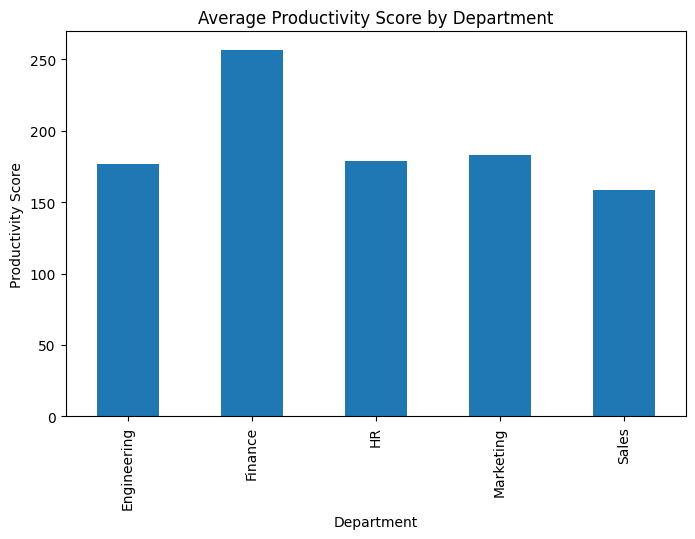

In [ ]:
dept_summary["Productivity_Score"].plot(kind="bar")
plt.title("Average Productivity Score by Department")
plt.ylabel("Productivity Score")
plt.xlabel("Department")
plt.show()


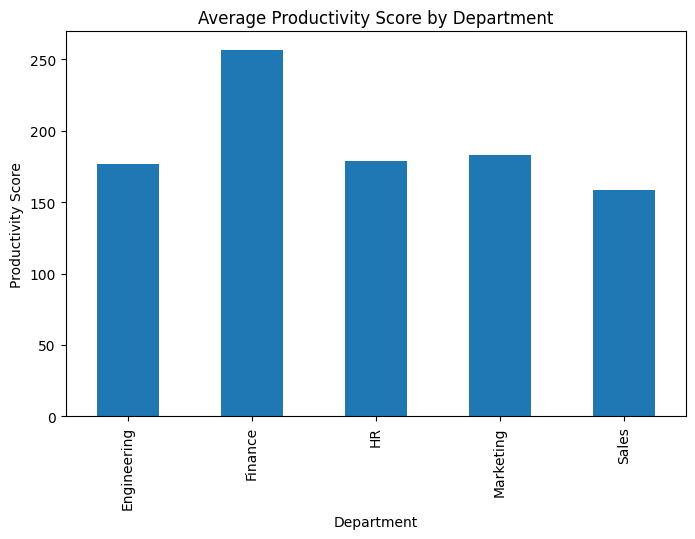

In [ ]:
dept_summary["Productivity_Score"].plot(kind="bar")
plt.title("Average Productivity Score by Department")
plt.ylabel("Productivity Score")
plt.xlabel("Department")
plt.show()


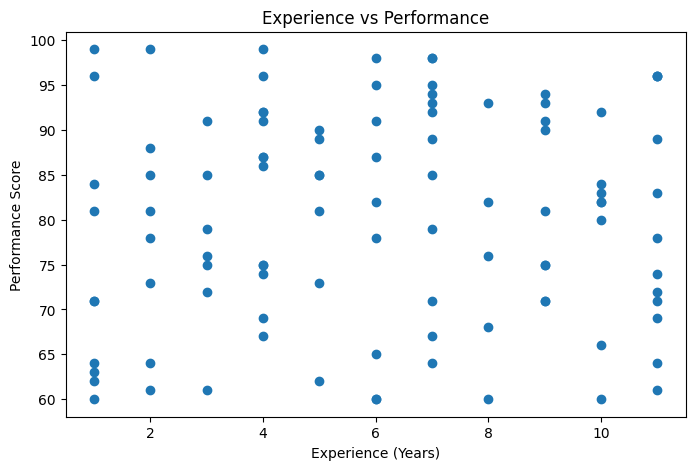

In [ ]:
plt.scatter(df["Experience_Years"], df["Performance_Score"])
plt.title("Experience vs Performance")
plt.xlabel("Experience (Years)")
plt.ylabel("Performance Score")
plt.show()


In [ ]:
threshold = df["Productivity_Score"].quantile(0.85)
high_value_employees = df[df["Productivity_Score"] >= threshold]

high_value_employees[[
    "Employee_ID",
    "Department",
    "Productivity_Score",
    "Performance_Score",
    "Monthly_Salary"
]].head()


,Employee_ID,Department,Productivity_Score,Performance_Score,Monthly_Salary
2,1004,Marketing,660.000000,60,32049
11,1014,Sales,424.666667,91,81407
13,1016,Sales,567.000000,81,34499
34,1041,Finance,1344.000000,96,33987
42,1050,Finance,588.000000,84,75525


In [ ]:
overworked = df[
    (df["Avg_Weekly_Hours"] > 50) &
    (df["Performance_Score"] < 70)
]

overworked[[
    "Employee_ID",
    "Department",
    "Avg_Weekly_Hours",
    "Performance_Score"
]].head()


,Employee_ID,Department,Avg_Weekly_Hours,Performance_Score
39,1046,Engineering,54,60
47,1055,HR,55,64
68,1082,Engineering,55,64
76,1090,HR,52,64
77,1091,HR,53,63


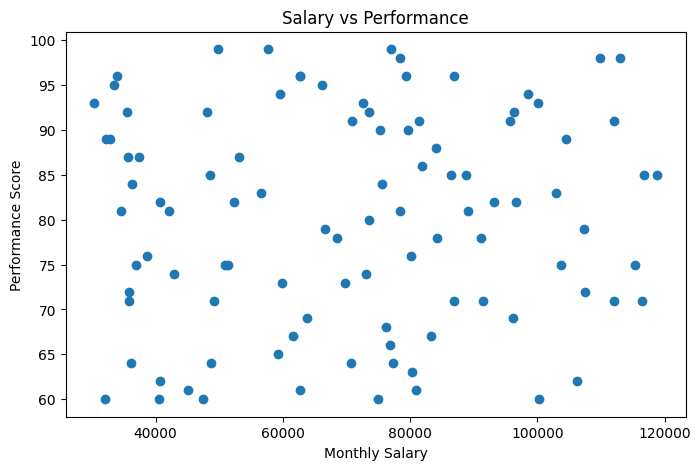

In [ ]:
plt.scatter(df["Monthly_Salary"], df["Performance_Score"])
plt.title("Salary vs Performance")
plt.xlabel("Monthly Salary")
plt.ylabel("Performance Score")
plt.show()


In [ ]:
df["Promotion_Readiness"] = (
    0.5 * df["Performance_Score"] +
    0.3 * df["Productivity_Score"] -
    0.2 * df["Workload_Index"]
)

df.sort_values("Promotion_Readiness", ascending=False).head(10)


,Employee_ID,Department,Experience_Years,Monthly_Salary,Performance_Score,Projects_Completed,Avg_Weekly_Hours,Productivity_Score,Salary_Efficiency,Workload_Index,Promotion_Readiness
43,1051,Finance,1,49830,99,14,51,1386.0,0.001987,0.515152,465.196970
34,1041,Finance,1,33987,96,14,45,1344.0,0.002825,0.468750,451.106250
51,1063,Marketing,1,78404,81,13,46,1053.0,0.001033,0.567901,356.286420
57,1070,Finance,1,86835,71,13,55,923.0,0.000818,0.774648,312.245070
77,1091,HR,1,80336,63,12,53,756.0,0.000784,0.841270,258.131746
88,1107,HR,1,40729,62,12,49,744.0,0.001522,0.790323,254.041935
68,1082,Engineering,1,48711,64,11,55,704.0,0.001314,0.859375,243.028125
2,1004,Marketing,1,32049,60,11,38,660.0,0.001872,0.633333,227.873333
42,1050,Finance,1,75525,84,7,43,588.0,0.001112,0.511905,218.297619
13,1016,Sales,2,34499,81,14,47,567.0,0.002348,0.580247,210.483951
